In [1]:
import FinancialMachineLearning as fml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet('./Data/IVE_tickbidask.parq')
df

,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:30:00,50.79,50.70,50.79,100,100,5079.00
2009-09-28 09:30:00,50.71,50.70,50.79,638,638,32352.98
2009-09-28 09:31:32,50.75,50.75,50.76,100,100,5075.00
2009-09-28 09:31:33,50.75,50.72,50.75,100,100,5075.00
2009-09-28 09:31:50,50.75,50.73,50.76,300,300,15225.00
...,...,...,...,...,...,...
2018-10-05 15:59:59,116.20,116.18,116.19,2000,2000,232400.00
2018-10-05 15:59:59,116.20,116.18,116.19,3900,3900,453180.00
2018-10-05 16:00:00,116.22,116.20,116.21,42884,42884,4983978.48


<AxesSubplot:xlabel='price'>

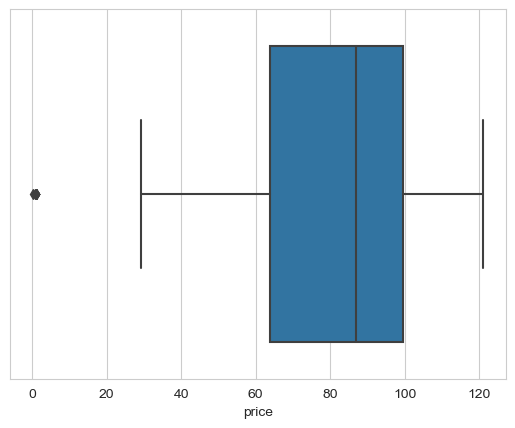

In [3]:
sns.boxplot(df.price)

In [4]:
mad = fml.madOutlier(df.price.values.reshape(-1, 1))
df = df.loc[~mad]
df

86.96
[36.17 36.25 36.21 ... 29.26 29.26 29.26]
[1.41225268 1.41537627 1.41381447 ... 1.14245268 1.14245268 1.14245268]


,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:30:00,50.79,50.70,50.79,100,100,5079.00
2009-09-28 09:30:00,50.71,50.70,50.79,638,638,32352.98
2009-09-28 09:31:32,50.75,50.75,50.76,100,100,5075.00
2009-09-28 09:31:33,50.75,50.72,50.75,100,100,5075.00
2009-09-28 09:31:50,50.75,50.73,50.76,300,300,15225.00
...,...,...,...,...,...,...
2018-10-05 15:59:59,116.20,116.18,116.19,2000,2000,232400.00
2018-10-05 15:59:59,116.20,116.18,116.19,3900,3900,453180.00
2018-10-05 16:00:00,116.22,116.20,116.21,42884,42884,4983978.48


### Chapter 3. Labeling

#### Exercise 1
E-mini S&P 500 선물 데이터 계열에 대한 Dollar Bar를 구축하라

**(a)** 임계값이 일별 수익률의 표준 편차인 대칭 $\mathrm{CUSUM}$ filter를 적용하라

In [5]:
dollar_M = 1000000
dollar_df = fml.BarSampling(df, 'dv', dollar_M)
dollar_df = dollar_df.groupby(level = 0).first()
dollar_df

,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:46:35,51.07,51.05,51.07,900,900,45963.00
2009-09-28 09:53:49,51.14,51.13,51.14,2000,2000,102280.00
2009-09-28 09:55:26,51.14,51.11,51.14,100,100,5114.00
2009-09-28 10:02:52,51.25,51.24,51.26,4300,4300,220375.00
2009-09-28 10:10:21,51.29,51.28,51.29,4500,4500,230805.00
...,...,...,...,...,...,...
2018-10-05 15:58:23,116.19,116.19,116.20,1354,1354,157321.26
2018-10-05 15:59:20,116.18,116.17,116.19,300,300,34854.00
2018-10-05 15:59:55,116.19,116.18,116.20,800,800,92952.00


In [6]:
dailyVol = fml.getDailyVolatility(dollar_df.price)
dailyVol

dates
2009-09-29 09:59:21         NaN
2009-09-29 10:04:46    0.005981
2009-09-29 10:31:39    0.004469
2009-09-29 10:52:23    0.004376
2009-09-29 11:34:53    0.004261
                         ...   
2018-10-05 15:58:23    0.003059
2018-10-05 15:59:20    0.003037
2018-10-05 15:59:55    0.003014
2018-10-05 15:59:59    0.002990
2018-10-05 16:00:00    0.002964
Name: dailyVol, Length: 49969, dtype: float64

In [7]:
threshold = 1.65 * dailyVol.std() + dailyVol.mean()
cusum = fml.CusumEvents(dollar_df.price, threshold)

In [8]:
tEvents = dollar_df.iloc[cusum].index
tEvents

DatetimeIndex(['2009-09-28 09:53:49', '2009-09-28 10:02:52',
               '2009-09-28 10:10:21', '2009-09-28 10:19:36',
               '2009-09-28 10:24:23', '2009-09-28 10:34:30',
               '2009-09-28 11:10:57', '2009-09-28 11:24:29',
               '2009-09-28 11:37:06', '2009-09-28 11:51:43',
               ...
               '2018-10-05 15:22:55', '2018-10-05 15:27:58',
               '2018-10-05 15:33:58', '2018-10-05 15:45:00',
               '2018-10-05 15:48:02', '2018-10-05 15:53:55',
               '2018-10-05 15:56:25', '2018-10-05 15:58:23',
               '2018-10-05 15:59:59', '2018-10-05 16:00:00'],
              dtype='datetime64[ns]', name='dates', length=41774, freq=None)

**(b)** 코드 3.4 (Vertical Barrier)를 pandas Series t1에 사용하라. numDays = 1이다

In [9]:
t1 = fml.addVerticalBarrier(tEvents, dollar_df.price, numDays = 1)
t1

dates
2009-09-28 09:53:49   2009-09-29 09:59:21
2009-09-28 10:02:52   2009-09-29 10:04:46
2009-09-28 10:10:21   2009-09-29 10:31:39
2009-09-28 10:19:36   2009-09-29 10:31:39
2009-09-28 10:24:23   2009-09-29 10:31:39
                              ...        
2018-10-04 15:31:17   2018-10-05 15:33:58
2018-10-04 15:41:04   2018-10-05 15:45:00
2018-10-04 15:47:18   2018-10-05 15:48:02
2018-10-04 15:51:37   2018-10-05 15:53:55
2018-10-04 16:00:00   2018-10-05 16:00:00
Name: dates, Length: 41737, dtype: datetime64[ns]

**(c)** 표본 추출된 특성에 Triple Barrier method를 적용하라. ptSl = [1,1]이고 t1은 1.b에서 생성한 series이다

In [10]:
ptsl = [1, 1]
minRet = 0.001
event = fml.getEvents(dollar_df.price, tEvents, ptsl, dailyVol, minRet, 1, t1 = t1)
event

,t1,trgt
dates,,
2009-09-29 10:04:46,2009-09-30 09:56:31,0.005981
2009-09-29 10:31:39,2009-09-29 12:00:17,0.004469
2009-09-29 10:52:23,2009-09-30 09:44:47,0.004376
2009-09-29 11:34:53,2009-09-30 09:44:47,0.004261
2009-09-29 12:00:17,2009-09-29 13:30:07,0.004977
...,...,...
2018-10-05 15:53:55,NaT,0.003134
2018-10-05 15:56:25,NaT,0.003108
2018-10-05 15:58:23,NaT,0.003059


**(d)** getBins를 적용해 Label을 생성하라

In [11]:
labels = fml.getBins(event, dollar_df.price)
labels

,ret,bin
dates,,
2009-09-29 10:04:46,-0.012754,-1.0
2009-09-29 10:31:39,-0.004635,-1.0
2009-09-29 10:52:23,-0.005233,-1.0
2009-09-29 11:34:53,-0.004461,-1.0
2009-09-29 12:00:17,0.005629,1.0
...,...,...
2018-10-05 10:50:40,-0.004462,-1.0
2018-10-05 11:02:25,-0.004260,-1.0
2018-10-05 11:11:13,-0.004438,-1.0


#### Exercise 2
Exercise 1에서 코드 3.8(dropLabel)을 사용해 개수가 아주 작은 Label을 제거하라

In [12]:
drop_labels = fml.dropLabels(labels, 0.05)
drop_labels

dropped label 0.0 0.0020131332981833867


,ret,bin
dates,,
2009-09-29 10:04:46,-0.012754,-1.0
2009-09-29 10:31:39,-0.004635,-1.0
2009-09-29 10:52:23,-0.005233,-1.0
2009-09-29 11:34:53,-0.004461,-1.0
2009-09-29 12:00:17,0.005629,1.0
...,...,...
2018-10-05 10:50:40,-0.004462,-1.0
2018-10-05 11:02:25,-0.004260,-1.0
2018-10-05 11:11:13,-0.004438,-1.0


#### Exercise 3
getBins함수를 수정해 최초로 도달한 것이 Vertical Barrier이면 0을 반환하도록 만들어 보라

In [13]:
labels_new = fml.getBinsNew(event, dollar_df.price, t1)
labels_new

,ret,bin
dates,,
2009-09-29 10:04:46,-0.012754,-1.0
2009-09-29 10:31:39,-0.004635,0.0
2009-09-29 10:52:23,-0.005233,-1.0
2009-09-29 11:34:53,-0.004461,-1.0
2009-09-29 12:00:17,0.005629,0.0
...,...,...
2018-10-05 10:50:40,-0.004462,0.0
2018-10-05 11:02:25,-0.004260,0.0
2018-10-05 11:11:13,-0.004438,0.0


#### Exercise 4
잘 알려진 기술적 분석 통계량에 기초해 Trend-following전략을 개발하라. 모델을 각 관측값에 대해 방향을 제안하지만, 크기는 제안하지 않는다.

In [14]:
window = 5
bb_df = pd.DataFrame()
bb_df['price'], bb_df['ave'], bb_df['upper'], bb_df['lower'] = fml.getBollingerBand(dollar_df.price, window = window, numsd = 1)
bb_df.dropna(inplace = True)
bb_df

,price,ave,upper,lower
dates,,,,
2009-09-28 10:10:21,51.29,51.178,51.258,51.098
2009-09-28 10:19:36,51.23,51.210,51.270,51.150
2009-09-28 10:24:23,51.25,51.232,51.282,51.182
2009-09-28 10:34:30,51.33,51.270,51.306,51.234
2009-09-28 10:45:25,51.32,51.284,51.323,51.245
...,...,...,...,...
2018-10-05 15:58:23,116.19,116.227,116.255,116.199
2018-10-05 15:59:20,116.18,116.209,116.232,116.186
2018-10-05 15:59:55,116.19,116.206,116.230,116.182


<AxesSubplot:xlabel='dates'>

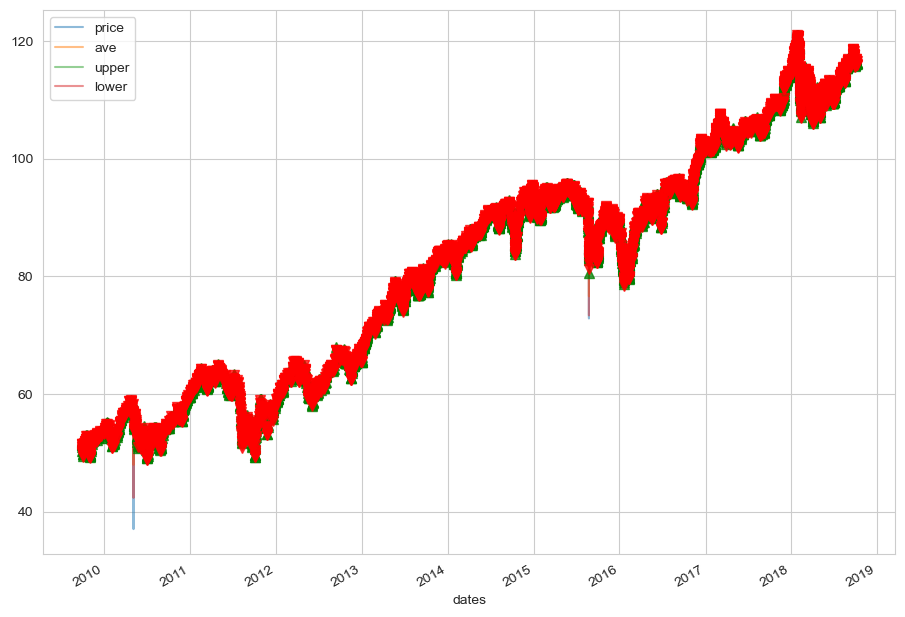

In [15]:
up = fml.getUpCross(bb_df, 'price')
down = fml.getDownCross(bb_df, 'price')

f, ax = plt.subplots(figsize = (11,8))

bb_df.loc[:].plot(ax=ax,alpha=.5)
up.loc[:].plot(ax = ax,ls = '', marker = '^', markersize = 7, alpha = .75, label = 'upcross', color = 'g')
down.loc[:].plot(ax = ax, ls = '', marker = 'v', markersize = 7, alpha = .75, label = 'downcross', color = 'r')

In [16]:
side_up = pd.Series(1,index = up.index)
side_down = pd.Series(-1, index = down.index)
side = pd.concat([side_up, side_down]).sort_index()
side

dates
2009-09-28 10:34:30    1
2009-09-28 11:37:06    1
2009-09-28 14:11:43   -1
2009-09-28 14:28:41    1
2009-09-28 15:34:40    1
                      ..
2018-10-05 13:48:37    1
2018-10-05 15:08:37    1
2018-10-05 15:48:02    1
2018-10-05 15:58:23   -1
2018-10-05 16:00:00    1
Length: 13013, dtype: int64

In [17]:
side.value_counts()

 1    6745
-1    6268
dtype: int64

**(a)** ptSl = [1,2]와 t1에 대해 Meta labeling을 만들어라. 여기서 numDays = 1이다. 코드 3.1(Daily Volatility)에서 계산된 일별 표준 편차를 target으로 사용하라.

In [18]:
from multiprocessing import cpu_count
import platform
if platform.system() == 'Windows':
    cpus = 1
else:
    cpus = cpu_count() - 1

minRet = .001
ptSl = [1,2]
MetaLabeling = fml.getEvents(dollar_df.price, tEvents, ptSl, dailyVol, minRet, cpus, t1 = t1, side = side)
MetaLabeling

2023-05-07 01:43:45.291498 100.0% getTripleBarrier done after 0.16 minutes. Remaining 0.0 minutes..


,t1,trgt,side
dates,,,
2009-09-29 10:04:46,2009-09-30 10:06:07,0.005981,NaN
2009-09-29 10:31:39,2009-09-30 10:37:22,0.004469,NaN
2009-09-29 10:52:23,2009-09-30 11:28:56,0.004376,NaN
2009-09-29 11:34:53,2009-09-30 11:57:40,0.004261,NaN
2009-09-29 12:00:17,2009-09-30 09:56:31,0.004977,-1.0
...,...,...,...
2018-10-05 15:53:55,NaT,0.003134,NaN
2018-10-05 15:56:25,NaT,0.003108,NaN
2018-10-05 15:58:23,NaT,0.003059,-1.0


In [19]:
MetaLabeling.side.value_counts()

 1.0    6519
-1.0    6049
Name: side, dtype: int64

**(b)** Random Forest를 학습해 거래할 것인지 말 것인지를 결정하라. 이때 유의할 점은 Base Model이 방향{-1, 1}을 결정하였으므로 정해야 할 사항은 거래할 것인지 말것인지를 판단하는 것이다

In [20]:
Meta_side = MetaLabeling.dropna().side
Meta_bins = fml.getBins(MetaLabeling, dollar_df.price).dropna()

In [21]:
Meta_bins

,ret,bin
dates,,
2009-09-29 12:00:17,0.009726,1.0
2009-09-29 13:30:07,-0.015269,0.0
2009-09-29 15:34:28,0.004519,1.0
2009-09-30 09:44:47,0.007403,1.0
2009-09-30 11:57:40,-0.013823,0.0
...,...,...
2018-10-04 14:16:16,-0.001151,0.0
2018-10-04 14:40:44,0.004907,1.0
2018-10-04 15:47:18,-0.002231,0.0


In [22]:
Xx = pd.merge_asof(Meta_bins, side.to_frame().rename(columns = {0:'side'}),
                   left_index = True, right_index = True, direction = 'forward')
Xx.ret.sum()

-0.11755227577374217

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, classification_report

X = Meta_side.values.reshape(-1, 1)
y = Meta_bins.bin.values
pd.DataFrame(X, y)

,0
1.0,-1.0
0.0,1.0
1.0,-1.0
1.0,-1.0
0.0,1.0
...,...
0.0,-1.0
1.0,1.0
0.0,1.0
0.0,1.0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)

In [25]:
rf = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=42)

              precision    recall  f1-score   support

         0.0       0.49      0.52      0.51      1744
         1.0       0.56      0.53      0.55      2025

    accuracy                           0.53      3769
   macro avg       0.53      0.53      0.53      3769
weighted avg       0.53      0.53      0.53      3769



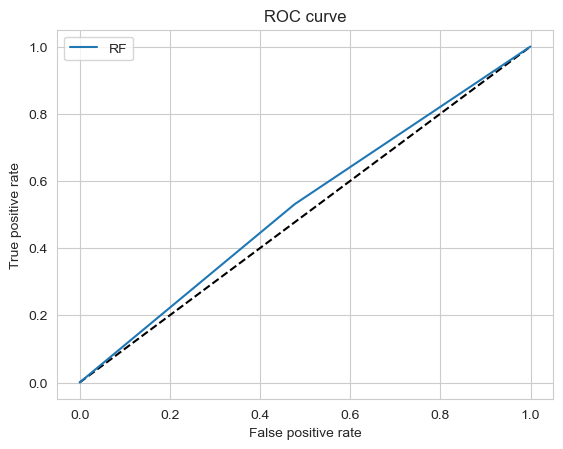

In [26]:
y_pred_rf = rf.predict_proba(X_test)[:,1]
y_pred = rf.predict(X_test)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
print(classification_report(y_test, y_pred))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

#### Exercise 5

Bollinger Band에 기초해 평균 회귀 전략을 개발하라. 각 관측값에 대해 모델은 방향을 제안하지만, 크기는 제안하지 않는다.

In [27]:
window = 5
bb_df = pd.DataFrame()
bb_df['price'], bb_df['ave'], bb_df['upper'], bb_df['lower'] = fml.getBollingerBand(dollar_df.price, window = window, numsd = dailyVol.mean())
bb_df.dropna(inplace = True)
bb_df

,price,ave,upper,lower
dates,,,,
2009-09-28 10:10:21,51.29,51.178,51.179,51.177
2009-09-28 10:19:36,51.23,51.210,51.210,51.210
2009-09-28 10:24:23,51.25,51.232,51.232,51.232
2009-09-28 10:34:30,51.33,51.270,51.270,51.270
2009-09-28 10:45:25,51.32,51.284,51.284,51.284
...,...,...,...,...
2018-10-05 15:58:23,116.19,116.227,116.227,116.226
2018-10-05 15:59:20,116.18,116.209,116.209,116.209
2018-10-05 15:59:55,116.19,116.206,116.206,116.206


<AxesSubplot:xlabel='dates'>

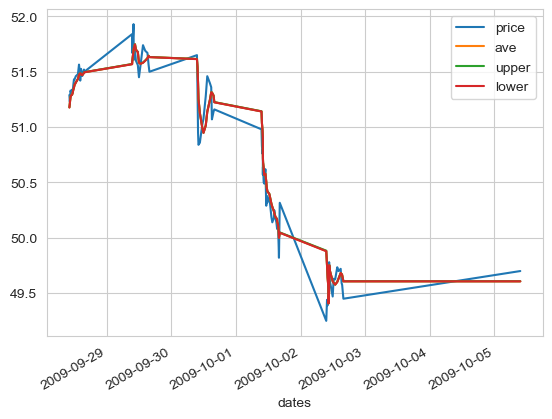

In [28]:
bb_df.iloc[:100].plot()

**(a)** ptSl = [0,2]와 t1에 대해 Meta Labeling을 만들어라. 여기서 numDays = 1이다. 코드 3.1에서 계산된 일별 표준 편차를 Target으로 사용하라.

In [29]:
up = fml.getUpCross(bb_df, 'price')
down = fml.getDownCross(bb_df, 'price')

side_up = pd.Series(1,index = up.index)
side_down = pd.Series(-1, index = down.index)
side = pd.concat([side_up, side_down]).sort_index()

minRet = .001
ptSl = [0,2]
MetaLabeling = fml.getEvents(dollar_df.price, tEvents, ptSl, dailyVol, minRet, cpus, t1 = t1, side = side)
MetaLabeling

2023-05-07 01:44:00.710574 100.0% getTripleBarrier done after 0.17 minutes. Remaining 0.0 minutes..


,t1,trgt,side
dates,,,
2009-09-29 10:04:46,2009-09-30 10:06:07,0.005981,-1.0
2009-09-29 10:31:39,2009-09-30 10:37:22,0.004469,NaN
2009-09-29 10:52:23,2009-09-30 11:28:56,0.004376,NaN
2009-09-29 11:34:53,2009-09-30 11:57:40,0.004261,NaN
2009-09-29 12:00:17,2009-09-30 12:48:14,0.004977,NaN
...,...,...,...
2018-10-05 15:53:55,NaT,0.003134,NaN
2018-10-05 15:56:25,NaT,0.003108,NaN
2018-10-05 15:58:23,NaT,0.003059,-1.0


In [30]:
MetaLabeling.side.value_counts()

 1.0    5928
-1.0    5920
Name: side, dtype: int64

**(b)** Random Forest를 학습해 거래할 것인지 말 것인지를 결정하라. 변동성, 계열 상관관계, 연습문제 2의 교차 이동 평균을 특성으로 사용하라.

In [31]:
window = 5
Meta_side = MetaLabeling.dropna().side
Meta_bins = fml.getBins(MetaLabeling, dollar_df.price).dropna()
srl_corr = fml.df_rolling_autocorr(fml.getReturns(dollar_df.price), window = window).rename('srl_corr')
srl_corr

dates
2009-09-28 09:53:49         NaN
2009-09-28 09:55:26         NaN
2009-09-28 10:02:52         NaN
2009-09-28 10:10:21         NaN
2009-09-28 10:19:36         NaN
                         ...   
2018-10-05 15:58:23   -0.078437
2018-10-05 15:59:20   -0.749351
2018-10-05 15:59:55   -0.396790
2018-10-05 15:59:59    0.059974
2018-10-05 16:00:00    0.027551
Name: srl_corr, Length: 49995, dtype: float64

In [32]:
features = (pd.DataFrame().assign(vol = MetaLabeling.trgt).assign(ma_side = Meta_side).assign(srl_corr = srl_corr).drop_duplicates().dropna())
features

,vol,ma_side,srl_corr
dates,,,
2009-09-29 10:04:46,0.005981,-1.0,-0.867394
2009-09-29 13:30:07,0.004521,1.0,0.171970
2009-09-29 15:34:28,0.003945,-1.0,-0.010605
2009-09-30 09:32:03,0.004160,1.0,-0.217132
2009-09-30 09:44:47,0.005038,-1.0,-0.806293
...,...,...,...
2018-10-04 13:44:24,0.004306,1.0,0.560897
2018-10-04 13:54:45,0.004373,-1.0,0.064686
2018-10-04 14:40:44,0.004498,1.0,-0.309659


In [33]:
Xy = (pd.merge_asof(features, Meta_bins[['bin']], left_index=True, right_index=True,  direction='forward').dropna())

In [34]:
Xy.bin.value_counts()

0.0    5951
1.0    5888
Name: bin, dtype: int64

              precision    recall  f1-score   support

    no_trade       0.52      0.54      0.53      2981
       trade       0.51      0.49      0.50      2939

    accuracy                           0.52      5920
   macro avg       0.52      0.52      0.52      5920
weighted avg       0.52      0.52      0.52      5920



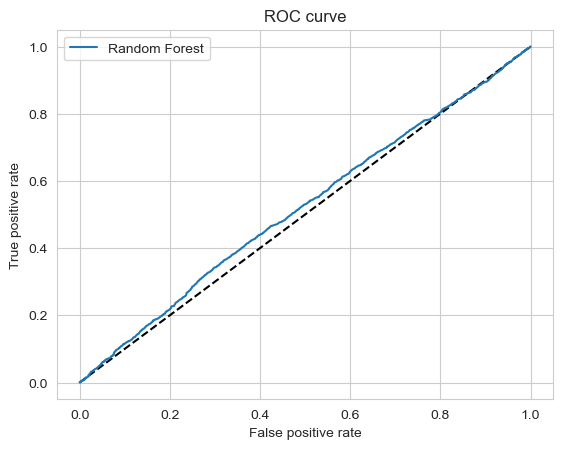

In [35]:
X = Xy.drop('bin',axis = 1).values
y = Xy['bin'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, shuffle = False)

n_estimator = 1000
rf = RandomForestClassifier(n_estimators = n_estimator, criterion = 'entropy', random_state = 42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
y_pred = rf.predict(X_test)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
print(classification_report(y_test, y_pred, target_names = ['no_trade','trade']))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label = 'Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

**(c)** Primary Model의 accuracy는 어떤가? precision, recall, f1-score는 어떠한가?

2023-05-07 01:44:26.561929 100.0% getTripleBarrier done after 0.2 minutes. Remaining 0.0 minutes..


              precision    recall  f1-score   support

    no_trade       0.52      0.54      0.53      2981
       trade       0.51      0.49      0.50      2939

    accuracy                           0.52      5920
   macro avg       0.52      0.52      0.52      5920
weighted avg       0.52      0.52      0.52      5920



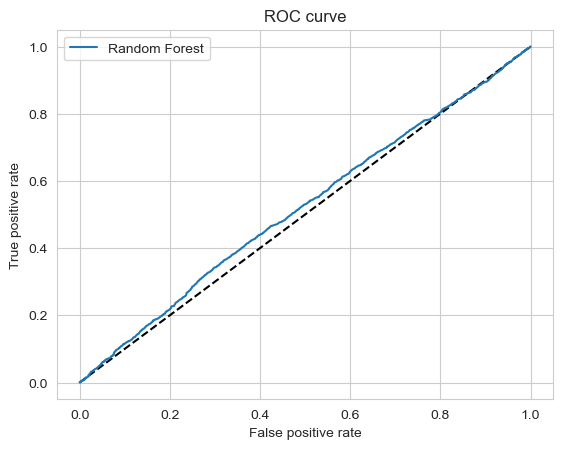

In [36]:
minRet = .001
ptsl = [0,2]
bb_events = fml.getEvents(dollar_df.price, tEvents, ptSl, dailyVol, minRet, cpus, t1 = t1, side = side)
bb_bins = fml.getBins(bb_events, dollar_df.price).dropna()
features = (pd.DataFrame().assign(vol = bb_events.trgt).assign(ma_side = Meta_side).assign(srl_corr = srl_corr).drop_duplicates().dropna())
Xy = (pd.merge_asof(features, bb_bins[['bin']], left_index=True, right_index=True, direction='forward').dropna())

X = Xy.drop('bin',axis=1).values
y = Xy['bin'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, shuffle = False)

n_estimator = 1000
rf = RandomForestClassifier(n_estimators = n_estimator, criterion = 'entropy', random_state = 42)
rf.fit(X_train, y_train)

# The random forest model by itself
y_pred_rf = rf.predict_proba(X_test)[:, 1]
y_pred = rf.predict(X_test)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
print(classification_report(y_test, y_pred,
                            target_names=['no_trade','trade']))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label = 'Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

**(d)** Secondary Model 예측의 accuracy는 어떠한가? precision, recall, f1-score는 어떠한가?